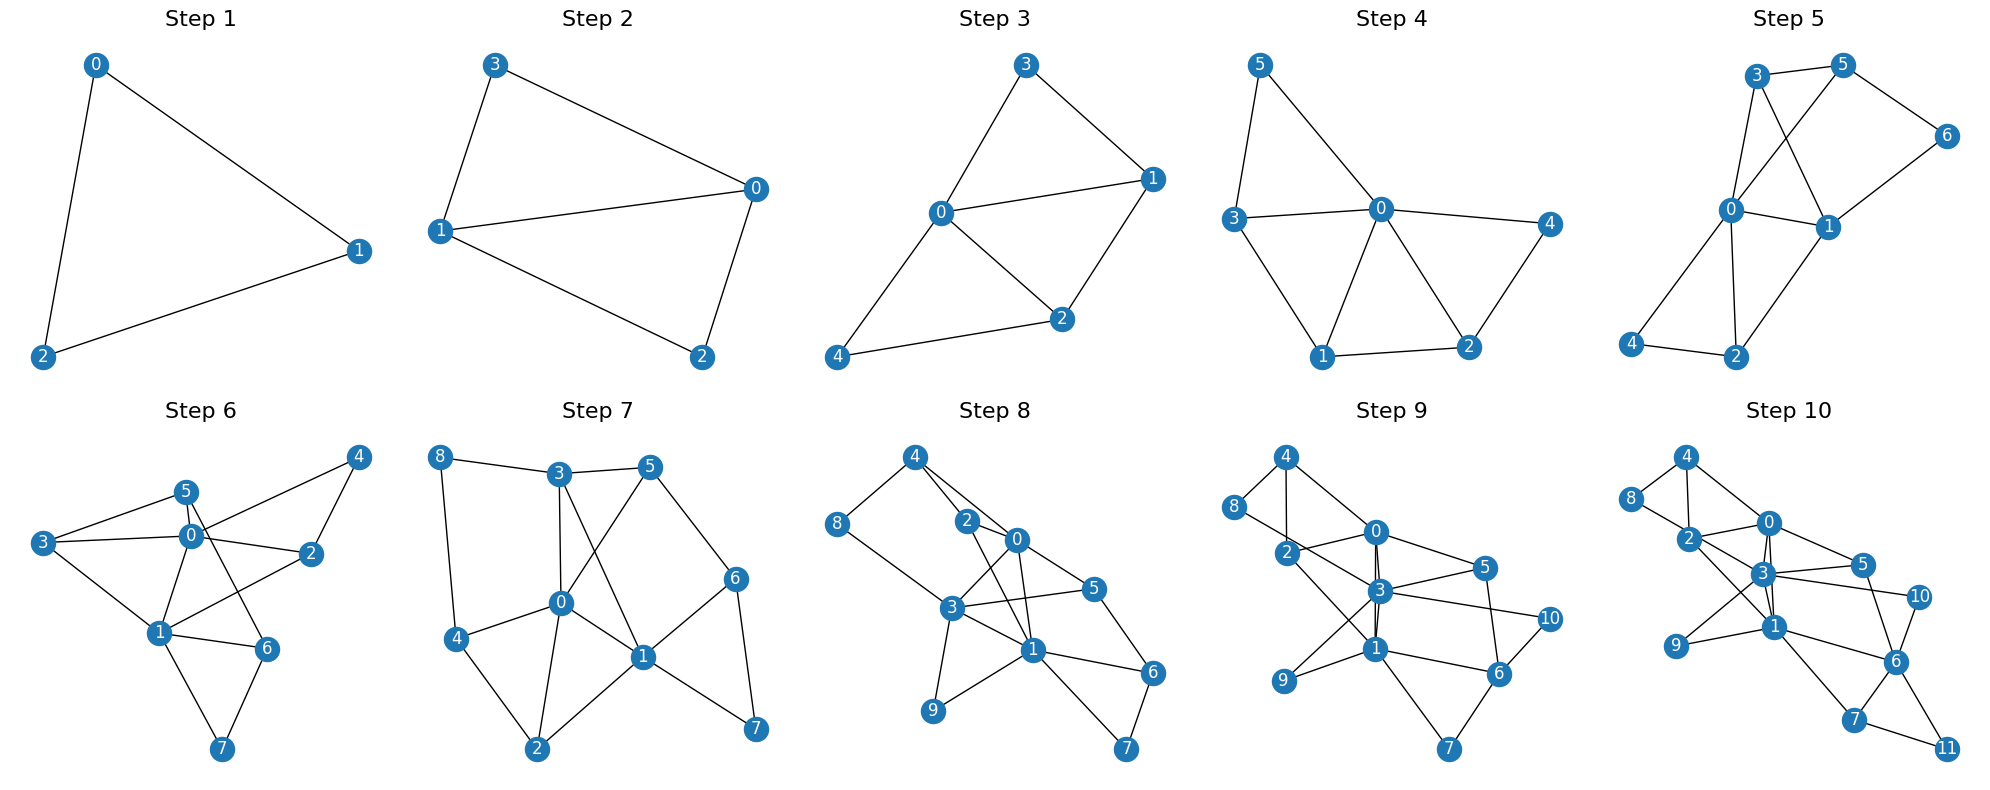

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def add_node_with_preferential_attachment(G, m):
    """
    Adds a new node to graph G and connects it to m existing nodes.
    The probability of connecting to an existing node is proportional to its degree.
    (Barabási-Albert model)
    """
    new_node = len(G.nodes())
    degrees = dict(G.degree())
    # Create a weighted list where each node appears as many times as its degree.
    weighted_nodes = [node for node, deg in degrees.items() for _ in range(deg)]
    
    # Ensure we select m unique nodes to attach to.
    targets = set()
    while len(targets) < m:
        targets.add(random.choice(weighted_nodes))
    
    # Add the new node and create edges.
    G.add_node(new_node)
    for target in targets:
        G.add_edge(new_node, target)

# Initialize the graph with 2 connected nodes.
G = nx.Graph()
G.add_edge(0, 1)

# Settings: number of steps and number of edges per new node.
num_steps = 10
m = 2  # Each new node connects with 1 edge

# Create a grid of subplots: 2 rows x 5 columns = 10 plots.
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Build the network incrementally and plot at each step.
for step in range(num_steps):
    add_node_with_preferential_attachment(G, m)
    pos = nx.spring_layout(G, seed=42)  # Use fixed seed for layout consistency
    ax = axes[step]
    nx.draw(G, pos, ax=ax, node_size=300, with_labels=True, font_color='white')
    ax.set_title(f"Step {step + 1}", fontsize=16)

plt.tight_layout()
plt.show()